**Analysis for the Prediction and the extracted grammer structure by the model**    

This Analysis code needs 1 folder and 2 files in saved_model.   
model_2103   
np_2103.pkl   
tokenizer_2103.pkl   

In [ ]:
#################################################################################
# ver = 2125;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2126;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2131;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2132;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2133;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2135;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2136;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4),
# ver = 2137;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2138;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
# ver = 2139;  # custom loss,  192 fb cells,   16 time steps @ver2.1, 8 ep, batch =16, lr=0.0032 (0.80,inc//4), 
###########################################################################################
ver = 21009;  # sqrt leak (0.02), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21010;  # sqrt leak (0.02), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21011;  # sqrt leak (0.02), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21012;  # sqrt leak (0.02), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21013;  # sqrt leak (0.02), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21014;  # sqrt leak (0.04), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21015;  # sqrt leak (0.04), gr (1),  192 cells, dp_ =0.0 (0.0), 8 ep, batch=64, lr=0.0064 (0.80,inc//4), clip = 8.0
ver = 21048;
ver = 21049;
ver = 21050;

In [ ]:
INTACT = 0; BLOCK_RECURRENT = 1;  BLOCK_FF = 2; ## BLOCK_FF works only when dropout layer exists (dp_rate>0)
rnn_cond = INTACT;

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "gdrive/My Drive/Colab/NLP" 

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab/NLP


In [ ]:
import numpy as np
import joblib
np.set_printoptions(threshold=np.inf)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
inc_tmstep_valrate = [16,16,0.9];  lr = 0.004 * np.array([1,1,1,1,1]);   str_c = ['','i','i_dp'];   
gr_scale = 10;  dp_rate = 0;  min_fb_gr_b = -1.6;  p_cell = 192;  dp_through_rate = 0.0;   
leaky_relu = 0.0;  p_relu_on = 0;  p_relu =0.0;  sqrt_leak = 0;
if ver > 2153 and ver < 2159:  p_cell = 512
if ver > 21964 and ver <= 21969:   sqrt_leak = 1;

In [ ]:
w_idx, idx_to_word, sents, loss_his, inc_tmstep_valrate = joblib.load('./saved_model/np_'+'{0:03d}'.format(ver)+'.pkl')

In [ ]:
time_step = np.size(sents,1)//2;      sents_2 = sents + 0;  
increments = inc_tmstep_valrate[0];   train_val_rate = inc_tmstep_valrate[2];   ep_lg = (len(loss_his[0])-1)/increments;   
if len(inc_tmstep_valrate)>3:  lr = inc_tmstep_valrate[3];  # available after ver2006
if len(inc_tmstep_valrate)>4:  gr_scale = inc_tmstep_valrate[4]; 
if len(inc_tmstep_valrate)>5:  dp_rate = inc_tmstep_valrate[5]; 
if len(inc_tmstep_valrate)>6:  min_fb_gr_b = inc_tmstep_valrate[6]; 
if len(inc_tmstep_valrate)>7:  p_cell = inc_tmstep_valrate[7]; 
if len(inc_tmstep_valrate)>8:  dp_through_rate = inc_tmstep_valrate[8]; 
if len(inc_tmstep_valrate)>9:  leaky_relu = inc_tmstep_valrate[9]; 
if len(inc_tmstep_valrate)>10:  p_relu_on = inc_tmstep_valrate[10]; 
if len(inc_tmstep_valrate)>11:  p_relu = inc_tmstep_valrate[11]; 
if len(inc_tmstep_valrate)>12:  sqrt_leak = inc_tmstep_valrate[12]; 
increments, ep_lg, lr[0], p_cell, gr_scale, dp_rate, dp_through_rate, leaky_relu, sqrt_leak

(32, 8.0, 0.0064, 192, 1, 0.0, 0.0, 0.02, 1)

In [ ]:
class FF_Dropout(layers.Dropout):
  def __init__(self, rate, noise_shape=None, **kwargs):
    self.rate = rate
    super(FF_Dropout, self).__init__(rate, **kwargs)
  def build(self, input_shape):
      dp_mask_shape = input_shape[1:]
      self.dp_mask = self.add_weight("mask",  shape=dp_mask_shape,  initializer='ones', trainable=False)
      self.dp_mask = tf.concat([tf.ones((dp_mask_shape[0]-1,dp_mask_shape[1])), dp_through_rate * tf.ones((1,dp_mask_shape[1]))],0)     # self.dp_mask[-1,:] = 0
  def call(self, inputs, training):
    output = inputs
    if (training == True and tf.random.uniform([]) < self.rate) or (rnn_cond == BLOCK_FF):  
        output = output * self.dp_mask
    return output

In [ ]:
class custom_RNNCell(layers.AbstractRNNCell):
    def __init__(self, units,  **kwargs):
        super(custom_RNNCell, self).__init__(**kwargs)
        self.units = units
        self.prelu = tf.keras.layers.PReLU(alpha_initializer=tf.initializers.constant(p_relu))

    @property
    def state_size(self):
        return self.units

    def build(self, input_shape):
        self.w_ff = self.add_weight( shape=(input_shape[-1], self.units),
            initializer='he_normal',     name='kernel') # glorot_uniform, he_normal, orthogonal,
        self.w_out2in = self.add_weight( shape=(self.units, self.units * gr_scale),
            initializer='identity', trainable=False,    name='recurrent_w1')
        self.w_out2in = tf.concat([tf.eye(self.units) for i in range(gr_scale)],1) # producing multiple copies of states in input layer
        self.b_r_in = self.add_weight( shape=(self.units * gr_scale,),
            name='recurrent_bias',  trainable=False,    initializer='zeros')   # for recurrent input cells
        self.b_r_in = tf.concat([tf.fill([self.units,], min_fb_gr_b *i/(gr_scale-0.0)) for i in range(gr_scale)],0) # multiple bias values for different gr populations
        self.w_in2pc = self.add_weight( shape=(self.units * gr_scale, self.units),
            initializer='he_normal',    name='recurrent_w2') #  # recurrent kernel
        # self.w_in2pc = tf.concat([ (1/gr_scale)*tf.eye(self.units) for i in range(gr_scale)],0)  # identity RNN
        self.bias = self.add_weight( shape=(self.units,),
            name='bias',     initializer='zeros')  # 'glorot_normal', 'zeros', 'he_normal' 
        self.built = True

    def call(self, inputs, states):
        # === recurrent activity (pc -> input cells) ======
        act_pc = states[0]
        act_out = act_pc
        act_in = tf.matmul(act_out, self.w_out2in)
        act_in = act_in + self.b_r_in
        if leaky_relu > 0 and sqrt_leak == 1:         
            act_in = tf.nn.leaky_relu(act_in, alpha = np.sqrt(leaky_relu))
        elif leaky_relu == 0 and p_relu_on == 0:  # else: linear
            act_in = tf.keras.activations.relu(act_in) 
        # ==== PC activity ====
        h = tf.matmul(inputs, self.w_ff);
        h = h + self.bias;
        pc = h + tf.matmul(act_in, self.w_in2pc);
        if p_relu_on == 1:                        pc = self.prelu(pc)  
        elif leaky_relu > 0 and sqrt_leak == 1:   pc = tf.nn.leaky_relu(pc, alpha = np.sqrt(leaky_relu))
        elif leaky_relu > 0:                      pc = tf.nn.leaky_relu(pc, alpha = leaky_relu)
        else:                                     pc = tf.keras.activations.relu(pc)
        return pc, pc

In [ ]:
##### building the model ######
def seq2vec_model_builder(HIDDEN_DIM):
    ##### input and embedding (one-hot) ######
    encoder_inputs = layers.Input(shape=(time_step, ), dtype='int32',)
    encoder_embedding = layers.Embedding(len(w_idx), len(w_idx), embeddings_initializer='identity', mask_zero=True, trainable=False)(encoder_inputs)
    ##### dropout ######
    encoder_embedding = FF_Dropout(dp_rate)(encoder_embedding)
    ##### RNN ##########
    c_cell = custom_RNNCell( HIDDEN_DIM )
    c_cell.initial_state = tf.zeros((1, HIDDEN_DIM), tf.float32)
    encoder_RNN = layers.RNN(c_cell, return_state=True,  name='sRNN')
    encoder_outputs, state_h = encoder_RNN(encoder_embedding)
    ##### output (dense) layer ##########
    dense_layer = layers.Dense(len(w_idx),  bias_initializer=keras.initializers.RandomNormal(stddev=0.00001), activation='softmax')
    outputs = dense_layer(encoder_outputs)
    model = keras.Model(encoder_inputs, outputs)
    return model
model = seq2vec_model_builder(HIDDEN_DIM = p_cell)

In [ ]:
def my_loss(y_true, y_pred):
    row_wise_sum  = tf.reduce_sum(tf.gather(y_true,  [0,1], axis = 1),axis=1)
    valid = tf.reshape(tf.where(tf.equal(row_wise_sum,0)), [-1])    
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    return loss_fn(y_true=tf.gather(y_true,  valid, axis = 0),  y_pred=tf.gather(y_pred,  valid, axis = 0))

In [ ]:
def my_top_k_acc(y_true, y_pred):
    row_wise_sum  = tf.reduce_sum(tf.gather(y_true,  [0,1], axis = 1),axis=1)
    valid = tf.where(tf.equal(row_wise_sum,0))     # removing y_true = 0 or 'unk'
    values, y_ind = tf.nn.top_k(y_true, 1);    values, top_k_pred = tf.nn.top_k(y_pred, 5);
    to_top5 = tf.constant( [[ 1, 1, 1, 1, 1]] , dtype=tf.int32 )
    input_y_for_top5 = tf.matmul( tf.reshape(y_ind,[-1, 1]) , to_top5 )
    correct_preds = tf.cast( tf.equal( input_y_for_top5 , top_k_pred ) , dtype=tf.float16)
    suc_pred = tf.reduce_sum(correct_preds, axis=1);
    return tf.reduce_mean( tf.gather(suc_pred,  tf.squeeze(valid), axis = 0) )

In [ ]:
#### optimizer ######
optimizer = keras.optimizers.Adam(learning_rate=0.0036, clipnorm=8.0) # Adam, Adadelta, RMSprop
model.compile(loss=my_loss, optimizer=optimizer, run_eagerly=True, metrics=['categorical_crossentropy', my_top_k_acc])

In [ ]:
if ver<2151: 
    model = keras.models.load_model('./saved_model/model_'+'{0:03d}'.format(ver), compile=False)
else:
    model.load_weights('./saved_model/model_'+'{0:03d}'.format(ver) + '/checkpoint/')

In [ ]:
inter_output_model = keras.Model(model.input, model.get_layer('sRNN').output )

In [ ]:
model.get_layer('sRNN')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 embedding (Embedding)       (None, 16, 3001)          9006001   
                                                                 
 ff__dropout (FF_Dropout)    (None, 16, 3001)          0         
                                                                 
 sRNN (RNN)                  [(None, 192),             613248    
                              (None, 192)]                       
                                                                 
 dense (Dense)               (None, 3001)              579193    
                                                                 
Total params: 10,198,442
Trainable params: 1,192,441
Non-trainable params: 9,006,001
__________________________________________

In [ ]:
############### Critical lines for inactivation ################################
if rnn_cond == BLOCK_RECURRENT:
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    # =============== set w_recurrent (192 to 192) as 0 ===============
    w_rnn = layer_dict['sRNN'].get_weights()
    w_rnn[1]  = 0 * w_rnn[1] 
    layer_dict['sRNN'].set_weights(w_rnn)
# =================================================================

In [ ]:
with open('./saved_model/tokenizer_'+'{0:03d}'.format(ver)+'.pkl', 'rb') as handle:
    tokenizer = joblib.load(handle)

In [ ]:
print(w_idx)

{'unk': 1, 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'a': 6, 'in': 7, 'was': 8, 'i': 9, 'he': 10, 'it': 11, 'that': 12, 'not': 13, 'his': 14, 'for': 15, 'you': 16, 'is': 17, 'as': 18, 'her': 19, 'with': 20, 'had': 21, 'be': 22, 'she': 23, 'but': 24, 'at': 25, 'on': 26, 'have': 27, 'dr': 28, 'all': 29, 'this': 30, 'him': 31, 'by': 32, 'they': 33, 'from': 34, 'so': 35, 'would': 36, 'were': 37, 'one': 38, 'which': 39, 'no': 40, 'will': 41, 'there': 42, 'are': 43, 'or': 44, 'my': 45, 'could': 46, 'do': 47, 'an': 48, 'what': 49, 'been': 50, 'when': 51, 'zero': 52, 'me': 53, 'their': 54, 'them': 55, 'very': 56, 'if': 57, 'more': 58, 'out': 59, 'who': 60, 'up': 61, 'said': 62, 'we': 63, 'now': 64, 'can': 65, 'little': 66, 'did': 67, 'your': 68, 'than': 69, 'then': 70, 'any': 71, 'some': 72, 'into': 73, 'time': 74, 'about': 75, 'only': 76, 'like': 77, 'has': 78, 'man': 79, 'such': 80, 'must': 81, 'much': 82, 'well': 83, 'other': 84, 'smith': 85, 'good': 86, 'how': 87, 'before': 88, 'know': 89, 'ja

In [ ]:
sent0 = sents +0;

In [ ]:
##### training data and validation data #######
train_val_rate = 0.90; # 90% for training, 10% for validation
train_start = 0;                train_end = round(len(sent0) * train_val_rate)
val_start = train_end + 1;      val_end = len(sent0);

In [ ]:
x, y = [],[]
for line in range(val_start, val_end):
    for i in range(len(sents[line])-time_step):
        if np.sum(sents[line][i:i+time_step])==0:  continue
        x.append(sents[line][i:i+time_step])
        y.append(sents[line][i+time_step])

In [ ]:
x = np.stack(x);  y = np.stack(y);

In [ ]:
##### model prediction ###### 
y_pred = model.predict(x, batch_size=4096, verbose=1);

22/22 [==============================] - 57s 3s/step


In [ ]:
y_pred_idx = np.argsort(-y_pred)[:,:10];

In [ ]:
##### chance level for val 2  ######
ch_top_k_mat = np.sum(np.ones((len(y),1))*np.array([2,3,4,5,6]) == (np.reshape(y,[-1,1]) * np.array([1,1,1,1,1])), axis=1);
ch_all = 100*np.mean(ch_top_k_mat[y>1]); # removing -1(EOS) and 1 (unknown)
ch_all # prediction correct rate, # of prediction

17.364365507554574

In [ ]:
##### Correct rate for val 2  ######
acc_top_k_mat = np.sum(y_pred_idx[:,:5] == (np.reshape(y,[-1,1]) * np.array([1,1,1,1,1])), axis=1);
val2_acc_all = 100*np.mean(acc_top_k_mat[y>1]); # removing -1(EOS) and 1 (unknown)
val2_acc_all,  np.sum(y>1)  # prediction correct rate, # of prediction

(37.192664645112174, 76179)

In [ ]:
acc_wd = np.zeros(len(w_idx));
for wd in range(len(w_idx)):
    acc_wd[wd] = np.mean(acc_top_k_mat[y==wd]); # removing -1(EOS) and 1 (unknown)
# val2_acc_all,  np.sum(y==2)  # prediction correct rate, # of prediction

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
acc_wd[2:22]*100

array([89.35, 80.38, 83.75, 76.43, 71.00, 56.05, 80.48, 61.38, 57.59,
       46.98, 48.84, 83.97, 53.90, 37.62, 54.11, 75.54, 37.75, 52.40,
       31.62, 63.35])

In [ ]:
## ========== word freq analysis ==============
all_counts = np.sum(sents>1);     freq_counts = np.zeros(len(w_idx));
for wd in range(len(w_idx)):
    freq_counts[wd] = np.sum(sents==wd)
wd_freq = freq_counts/all_counts

In [ ]:
wd_freq[2:12]*100

array([6.01, 3.31, 2.82, 3.01, 2.46, 1.85, 1.65, 1.83, 1.64, 1.58])

In [ ]:
np.sum(wd_freq[2:7]*100)

17.60152694240947

In [ ]:
wd_freq[:2]*100

array([188.81, 13.14])

In [ ]:
bins = [6.5, 5.0, 3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.1, 0.03, 0.01, 0.003, 0.0] 
acc_bins = np.zeros(len(bins)-1);    n_bins = np.zeros(len(bins)-1);

In [ ]:
for i in range(len(bins)-1):
    acc_bins[i] = 100* np.nanmean(acc_wd[np.logical_and(100*wd_freq<bins[i], 100*wd_freq>bins[i+1])]) 
    n_bins[i] = np.nansum(np.logical_and(100*wd_freq<bins[i], 100*wd_freq>bins[i+1])) 

In [ ]:
acc_bins, n_bins

(array([89.35, 78.40, 77.38, 60.50, 63.27, 38.99, 30.17, 23.48, 14.45,
        6.80, 2.59, 3.15]),
 array([1.00, 2.00, 2.00, 5.00, 5.00, 16.00, 34.00, 75.00, 220.00, 630.00,
        1826.00, 183.00]))

In [ ]:
x_center = bins[1:]-np.diff(bins)/2; bar_w = np.diff(bins);
x_center

array([5.75, 4.00, 2.50, 1.75, 1.25, 0.75, 0.38, 0.17, 0.07, 0.02, 0.01,
       0.00])

In [ ]:
x1=np.arange(0,6.5,0.002)

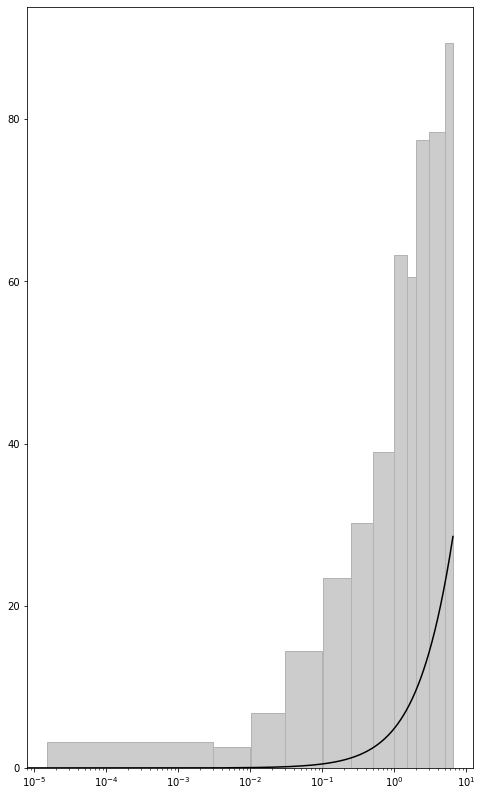

In [ ]:
fig = plt.figure(figsize=(8, 14)) # figure area
plt.bar(x_center, acc_bins, width=0.99*bar_w, edgecolor=0.7*np.array([1,1,1]),  color = [0.8,0.8,0.8])
plt.plot(x1, 100-100*np.power(1-x1/100,5), color='black' )
plt.xscale("log")

In [ ]:
for i in range(len(bins)-1):
    print("%f %%, when %f>freq>%f" % (acc_bins[i], bins[i], bins[i+1]) )

89.346688 %, when 6.500000>freq>5.000000
78.404458 %, when 5.000000>freq>3.000000
77.375790 %, when 3.000000>freq>2.000000
60.495506 %, when 2.000000>freq>1.500000
63.271611 %, when 1.500000>freq>1.000000
38.988934 %, when 1.000000>freq>0.500000
30.170639 %, when 0.500000>freq>0.250000
23.478310 %, when 0.250000>freq>0.100000
14.453434 %, when 0.100000>freq>0.030000
6.797537 %, when 0.030000>freq>0.010000
2.592694 %, when 0.010000>freq>0.003000
3.150407 %, when 0.003000>freq>0.000000


In [ ]:
wd_loc = 16-np.sum(x==0,1)

In [ ]:
wd_loc[:100]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16,  1,  2,  3,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
############ accuracy (correct rate) for each location in the sentence #################
acc_loc_val_corpus = [100*np.mean(acc_top_k_mat[wd_loc==(i+1)]) for i in range(12)];  #  acc_loc_val_corpus = np.array(acc_loc_val_corpus);
n_loc_val_corpu = [np.sum(wd_loc==(i+1)) for i in range(12)]
acc_loc_val_corpus, n_loc_val_corpu

([35.565907088002014,
  36.522724411431454,
  34.00183510289684,
  32.59310344827586,
  31.99591479428071,
  31.51969981238274,
  31.91702910672466,
  31.689630166787524,
  31.97412272103509,
  31.925281256633408,
  31.36939010356732,
  30.107258667997005],
 [7943, 7943, 7629, 7250, 6854, 6396, 5978, 5516, 5101, 4711, 4345, 4009])

In [ ]:
############ accuracy (correct rate) for each location of "the" in the sentence #################
acc_loc_the = [100*np.mean(acc_top_k_mat[np.logical_and(x[:,-1]==2,wd_loc==(i+1))]) for i in range(12)];   # acc_loc_the = np.array(acc_loc_the);
n_loc_the = [np.sum(np.logical_and(x[:,-1]==2,wd_loc==(i+1))) for i in range(12)]
acc_loc_the, n_loc_the

([5.2264808362369335,
  14.153846153846153,
  11.504424778761061,
  8.21529745042493,
  11.294765840220386,
  7.82608695652174,
  7.0821529745042495,
  10.48951048951049,
  8.469055374592834,
  9.15492957746479,
  6.5891472868217065,
  6.910569105691057],
 [574, 325, 339, 353, 363, 345, 353, 286, 307, 284, 258, 246])

In [ ]:
n_loc_val_corpu = np.array(n_loc_val_corpu);    n_loc_the = np.array(n_loc_the);    

In [ ]:
########### data to save #################################################################################
data3 = {'acc_bins':acc_bins.tolist(), 'x_center':x_center.tolist(),  'bar_w':bar_w.tolist(), 
         'wd_freq':wd_freq.tolist(), 'acc_wd':acc_wd.tolist(),    'n_bins':n_bins.tolist(), 
         'acc_loc_val_corpus':acc_loc_val_corpus, 'n_loc_val_corpu':n_loc_val_corpu.tolist(),
         'acc_loc_the':acc_loc_the, 'n_loc_the':n_loc_the.tolist()
         }
##########################################################################################################

In [ ]:
!pip install mat4py
from mat4py import savemat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
########### savin data with matlab format ###############
savemat('./saved_mat/v'+str(ver) + '_2.mat', data3)
#########################################################